# Artificial Intelligence (CS6364-002) 
## Homework 3 - Question 3
## Submission by - Adithya Sundararajan Iyer (asi200000)


Given an input image (see the attachment), design two filters/kernels with size of 3 by 3 to detect all horizontal and vertical edges.

In [1]:
import cv2
import numpy as np

In [2]:
img=cv2.imread('HW3-Q3-image.jpg')
print(img.shape)

(300, 276, 3)


To make it easier, you can first convert the image into gray scale using OpenCV.

In [4]:
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(grayImage.shape)
n = len(grayImage[0])
print(grayImage[0])

(300, 276)
[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255

Your architecture only contains 1 convolutional layer, 1 pooling layer and 1 fully connected layer.

In [5]:
hFilterMatrix = [[1,1,1],[0,0,0],[-1,-1,-1]] #for horizontal edge detector
vFilterMatrix = [[1,0,-1],[1,0,-1],[1,0,-1]] #for vertical edge detector
filterSize = 3

Show the visualizations of the output of the convolutional layer, the pooled layer and the ReLU activated convolutional layer (not the fully connected layer) for both kernels.

In [6]:
def convolution(matrix1,matrix2):
    w = 0
    for i in range(filterSize):
        for j in range(filterSize):
            w+=matrix1[i][j]*matrix2[i][j]
    return w


In [7]:
def convolutionLayer(image, filterMatrix):
    filtered_matrix = list()
    for i in range(n-filterSize+1):
        main_row = list()
        for j in range(n-filterSize+1):
            temp_matrix = list()
            for r in range(filterSize):
                row = list()
                for s in range(filterSize):
                    row.append(image[i+r][j+s])  
                temp_matrix.append(row)
            ans = convolution(temp_matrix,filterMatrix)
            main_row.append(ans)
        filtered_matrix.append(main_row)
    return filtered_matrix


In [8]:
horizontalFilteredMatrix = convolutionLayer(grayImage, hFilterMatrix)
verticalFilteredMatrix = convolutionLayer(grayImage, vFilterMatrix)

In [9]:
h_filtered_img = np.array(horizontalFilteredMatrix, dtype='uint8')
print(h_filtered_img.shape)
v_filtered_img = np.array(verticalFilteredMatrix, dtype='uint8')
print(v_filtered_img.shape)

(274, 274)
(274, 274)


In [10]:
def poolLayer(matrix, shape):
    r, c = shape
    pooledMatrix = []
    for i in range(r-filterSize+1):
        pooledRow = []
        for j in range(c-filterSize+1):
            values = 0
            for x in range(filterSize):
                for y in range(filterSize):
                    values += matrix[i+x][j+y]
            avgVal = values/(filterSize**2)
            pooledRow.append(int(avgVal))
        pooledMatrix.append(pooledRow)
    return pooledMatrix


In [11]:
horizontalPooledMatrix = poolLayer(horizontalFilteredMatrix, h_filtered_img.shape)
verticalPooledMatrix = poolLayer(verticalFilteredMatrix, v_filtered_img.shape)

In [12]:
h_pooled_img = np.array(horizontalPooledMatrix, dtype='uint8')
print(h_pooled_img.shape)
v_pooled_img = np.array(verticalPooledMatrix, dtype='uint8')
print(v_pooled_img.shape)

(272, 272)
(272, 272)


In [13]:
def relu(z):
    return max(0,z)


In [14]:
def ReluFilter(image, filterMatrix):
    relu_matrix = list()
    x, y = image.shape
    for i in range(x-filterSize+1):
        main_row = list()
        for j in range(y-filterSize+1):
            temp_matrix = list()
            for r in range(filterSize):
                row = list()
                for s in range(filterSize):
                    row.append(image[i+r][j+s])  
                temp_matrix.append(row)
            ans = relu(convolution(temp_matrix,filterMatrix))
            main_row.append(ans)
        relu_matrix.append(main_row)
    return relu_matrix


In [15]:
horizontalReluMatrix = ReluFilter(h_pooled_img, hFilterMatrix)
verticalReluMatrix = ReluFilter(v_pooled_img, vFilterMatrix)

In [16]:
h_relu_img = np.array(horizontalReluMatrix, dtype='uint8')
print(h_relu_img.shape)
v_relu_img = np.array(verticalReluMatrix, dtype='uint8')
print(v_relu_img.shape)

(270, 270)
(270, 270)




 Grayscale Image


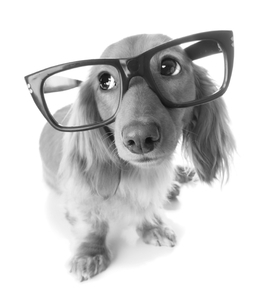

.....................................................................................................................


 Visualization of convolution layer output with horizontal edge detection kernel


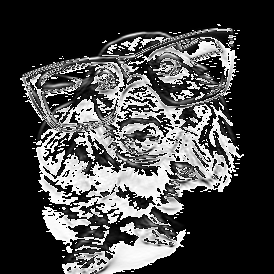

.....................................................................................................................


 Visualization of pooling layer output with horizontal edge detection kernel


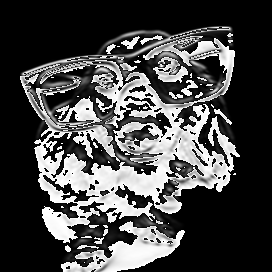

.....................................................................................................................


 Visualization of relu activated convolution layer output with horizontal edge detection kernel


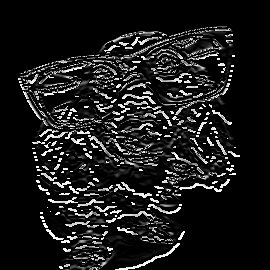

.....................................................................................................................


 Visualization of convolution layer output with vertical edge detection kernel


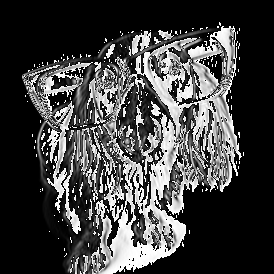

.....................................................................................................................


 Visualization of pooling layer output with vertical edge detection kernel


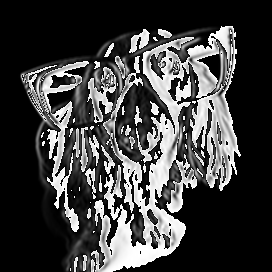

.....................................................................................................................


 Visualization of relu activated convolution layer output with vertical edge detection kernel


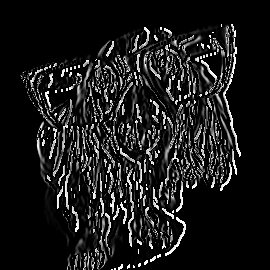

.....................................................................................................................


In [20]:
from google.colab.patches import cv2_imshow

def img_descr(imgp, descr):
  print('\n\n', descr)
  cv2_imshow(imgp)
  print('.....................................................................................................................')

img_descr(grayImage, 'Grayscale Image')
img_descr(h_filtered_img, 'Visualization of convolution layer output with horizontal edge detection kernel')
img_descr(h_pooled_img, 'Visualization of pooling layer output with horizontal edge detection kernel')
img_descr(h_relu_img, 'Visualization of relu activated convolution layer output with horizontal edge detection kernel')
img_descr(v_filtered_img, 'Visualization of convolution layer output with vertical edge detection kernel')
img_descr(v_pooled_img, 'Visualization of pooling layer output with vertical edge detection kernel')
img_descr(v_relu_img, 'Visualization of relu activated convolution layer output with vertical edge detection kernel')